<a href="https://colab.research.google.com/github/ArelyA/CE888_2020_Data-Science/blob/master/CE888_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

# Load and visualise the customers dataset

In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
  # <---INSERT YOUR CODE HERE--->
  new_samples = []
  new_samples = np.random.choice(sample, [n_iterations, sample_size])
  data_mean = np.mean(new_samples)
  it_mean = []
  for n_sample in new_samples:
    it_mean.append(n_sample)
  lower = np.percentile(it_mean, 2.5)
  upper = np.percentile(it_mean, 97.5)
  return data_mean, lower, upper

In [4]:
print(boostrap_mean(data, 3, 4))

(9.916666666666666, 2.55, 22.0)


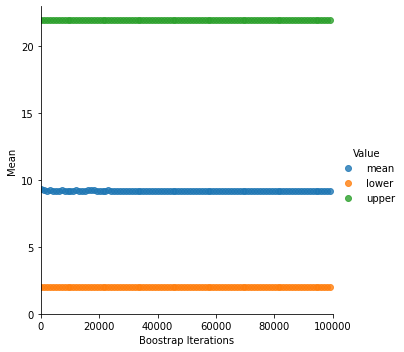

In [5]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
	# <---INSERT YOUR CODE HERE--->
  new_samples = []
  new_samples = np.random.choice(sample, [iterations, sample_size])
  data_mean = np.mean(new_samples)
  it_mean = []
  low = (100 - ci) /  2
  for n_sample in new_samples:
    it_mean.append(n_sample)
  lower = np.percentile(it_mean, low)
  upper = np.percentile(it_mean, ci + low)
  return data_mean, lower, upper

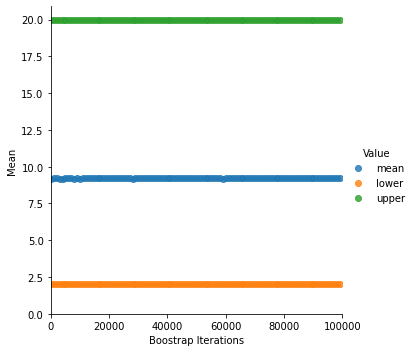

In [7]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

# Load and visualise the vehicles dataset

In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
data_fleet1 = df.values[:,0]
data_fleet1 = data_fleet1[~np.isnan(data_fleet1)]
data_fleet2 = df.values[:,1]
data_fleet2 = data_fleet2[~np.isnan(data_fleet2)]

## Histograms

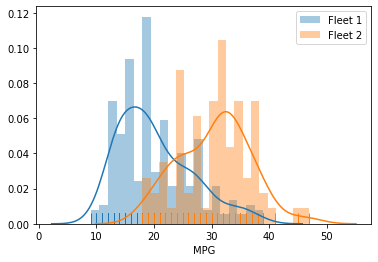

In [9]:
sns_plot = sns.distplot(data_fleet1, bins=20, kde=True, rug=True, label = 'Fleet 1', axlabel = 'MPG')
sns_plot = sns.distplot(data_fleet2, bins=20, kde=True, rug=True, label = 'Fleet 2', axlabel = 'MPG')
sns_plot.legend()

## Scatterplot

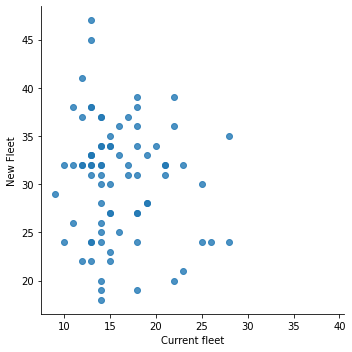

In [10]:
sns.lmplot(df.columns[0], df.columns[1], data=df, fit_reg=False)

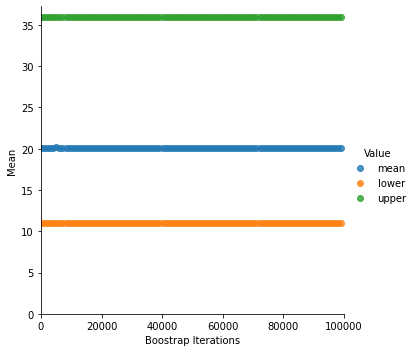

In [11]:
boots1 = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data_fleet1, data_fleet1.shape[0], i)
    boots1.append([i, boot[0], "mean"])
    boots1.append([i, boot[1], "lower"])
    boots1.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots1, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

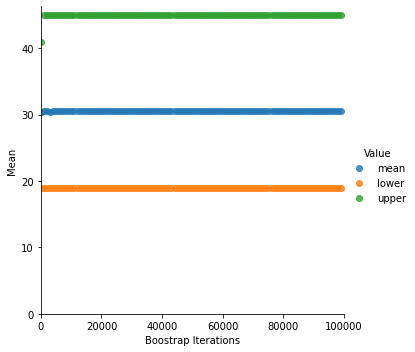

In [12]:
boots2 = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data_fleet2, data_fleet2.shape[0], i)
    boots2.append([i, boot[0], "mean"])
    boots2.append([i, boot[1], "lower"])
    boots2.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots2, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

In [23]:
t_obs = np.mean(data_fleet2)-np.mean(data_fleet1)
concat = np.concatenate((data_fleet1, data_fleet2))
count = 0
i = 0
perms = 20000
while i < perms:
  perm = np.random.permutation(concat)
  p_1 = perm[:int(len(perm)/2)]
  p_2 = perm[int(len(perm)/2):]
  if t_obs < (np.mean(p_2)-np.mean(p_1)):
    count += 1
  i += 1
p_val = count/perms

print(p_val)

0.0
